# Logistic Regression

## Libraries loading

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data loading

In [2]:
data <- read_csv('../00_data/Social_Network_Ads.csv')
head(data)

Rows: 400 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Age, EstimatedSalary, Purchased

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,EstimatedSalary,Purchased
<dbl>,<dbl>,<dbl>
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0


In [3]:
# data structure
glimpse(data)

Rows: 400
Columns: 3
$ Age             <dbl> 19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 32…
$ EstimatedSalary <dbl> 19000, 20000, 43000, 57000, 76000, 58000, 84000, 15000…
$ Purchased       <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, …


In [4]:
data <- data |>
        mutate(Purchased = factor(data$Purchased, levels = c(0, 1), labels = c('No', 'Yes')))

In [5]:
glimpse(data)

Rows: 400
Columns: 3
$ Age             <dbl> 19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 32…
$ EstimatedSalary <dbl> 19000, 20000, 43000, 57000, 76000, 58000, 84000, 15000…
$ Purchased       <fct> No, No, No, No, No, No, No, Yes, No, No, No, No, No, N…


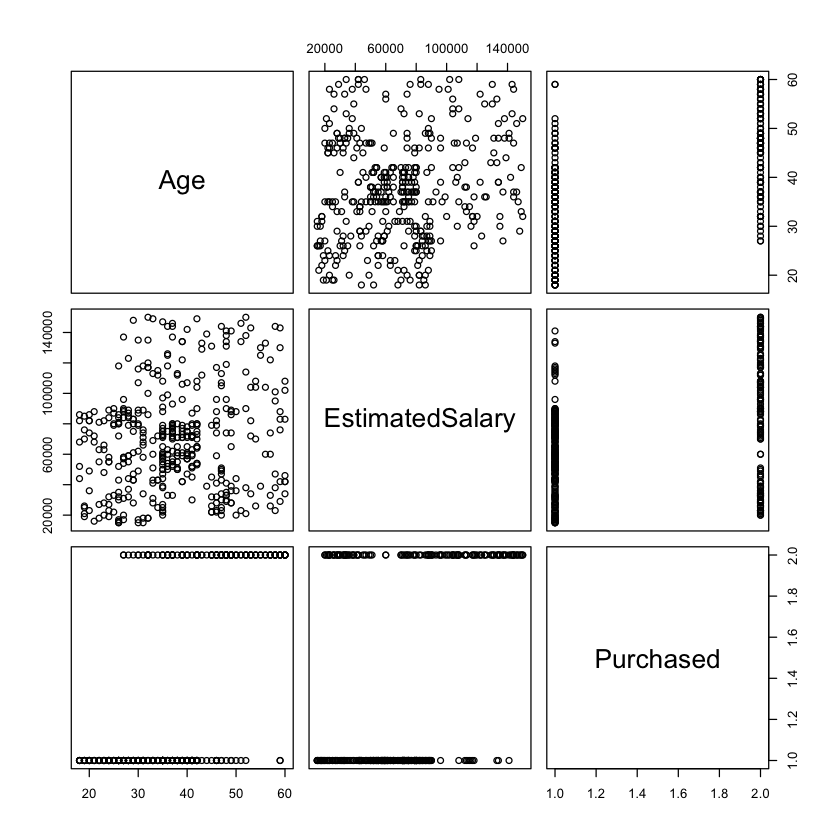

In [6]:
pairs(data)

# Splitting data into training and test set

In [7]:
set.seed(123)

train_data <- data |> slice_sample(prop = 0.75)
test_data <- data |> anti_join(train_data)

Joining with `by = join_by(Age, EstimatedSalary, Purchased)`


## Feature scaling

In [8]:
train_data[-3] <- scale(train_data[, -3])

test_data[-3] <- scale(test_data[, -3])

## Fit the model on training set

In [9]:
fit <- glm(Purchased ~ ., family = binomial,data = train_data)
fit


Call:  glm(formula = Purchased ~ ., family = binomial, data = train_data)

Coefficients:
    (Intercept)              Age  EstimatedSalary  
         -1.132            2.653            1.336  

Degrees of Freedom: 299 Total (i.e. Null);  297 Residual
Null Deviance:	    395.4 
Residual Deviance: 200 	AIC: 206

## Predicting on test set

In [10]:
# predicting of probs
prob_pred <- predict(fit, type = 'response', newdata = test_data[-3])
y_pred <- ifelse(prob_pred > 0.5, 'Yes', 'No')
y_pred

1     2     3     4     5     6     7     8     9    10    11    12    13 
 "No"  "No" "Yes"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No" 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 "No"  "No"  "No" "Yes"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No" 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
 "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No" 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
 "No"  "No" "Yes"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No"  "No" "Yes" 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
"Yes" "Yes" "Yes"  "No" "Yes" "Yes" "Yes" "Yes"  "No"  "No" "Yes" "Yes"  "No" 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
"Yes" "Yes" "Yes" "Yes"  "No"  "No"  "No" "Yes"  "No" "Yes"  "No" "Yes" "Yes" 
   79    80    81    82    83    84 
"Yes" "Yes" "Yes" "Yes"  "No" "Yes"

In [11]:
prob_pred

1           2           3           4           5           6 
0.000697184 0.008982271 0.704506647 0.006428509 0.371815113 0.278818626 
          7           8           9          10          11          12 
0.345296803 0.418428932 0.028212877 0.007639171 0.001835037 0.454695265 
         13          14          15          16          17          18 
0.055565601 0.001345819 0.396625469 0.038490841 0.989330297 0.020268131 
         19          20          21          22          23          24 
0.071419441 0.029558490 0.074420871 0.069217760 0.035092660 0.191544122 
         25          26          27          28          29          30 
0.011286469 0.163849799 0.064460822 0.157382195 0.304858782 0.356222072 
         31          32          33          34          35          36 
0.097893304 0.273160026 0.005864563 0.049476720 0.028066252 0.218419136 
         37          38          39          40          41          42 
0.121567990 0.083037898 0.035457568 0.009619177 0.005681518 0.523324604 
         43          44          45          46          47          48 
0.020838185 0.016160244 0.152967042 0.002506107 0.019986164 0.003148666 
         49          50          51          52          53          54 
0.040922321 0.009303554 0.027446735 0.582852335 0.995656589 0.983899357 
         55          56          57          58          59          60 
0.882373516 0.124819845 0.910689134 0.994115621 0.996268987 0.991554676 
         61          62          63          64          65          66 
0.281702582 0.321653862 0.685304251 0.991205817 0.251204001 0.618155628 
         67          68          69          70          71          72 
0.547121553 0.926915628 0.821073178 0.322824816 0.313195084 0.105008776 
         73          74          75          76          77          78 
0.633988040 0.356632024 0.959562215 0.230453211 0.930793916 0.945267608 
         79          80          81          82          83          84 
0.947431075 0.965024997 0.949513591 0.619420346 0.466991261 0.591449702

In [12]:
# logit
logit <- predict(fit, newdata = test_data[-3])
# prob = 1 / (1 + exp(-logit))

1 / (1 + exp(-logit))

1           2           3           4           5           6 
0.000697184 0.008982271 0.704506647 0.006428509 0.371815113 0.278818626 
          7           8           9          10          11          12 
0.345296803 0.418428932 0.028212877 0.007639171 0.001835037 0.454695265 
         13          14          15          16          17          18 
0.055565601 0.001345819 0.396625469 0.038490841 0.989330297 0.020268131 
         19          20          21          22          23          24 
0.071419441 0.029558490 0.074420871 0.069217760 0.035092660 0.191544122 
         25          26          27          28          29          30 
0.011286469 0.163849799 0.064460822 0.157382195 0.304858782 0.356222072 
         31          32          33          34          35          36 
0.097893304 0.273160026 0.005864563 0.049476720 0.028066252 0.218419136 
         37          38          39          40          41          42 
0.121567990 0.083037898 0.035457568 0.009619177 0.005681518 0.523324604 
         43          44          45          46          47          48 
0.020838185 0.016160244 0.152967042 0.002506107 0.019986164 0.003148666 
         49          50          51          52          53          54 
0.040922321 0.009303554 0.027446735 0.582852335 0.995656589 0.983899357 
         55          56          57          58          59          60 
0.882373516 0.124819845 0.910689134 0.994115621 0.996268987 0.991554676 
         61          62          63          64          65          66 
0.281702582 0.321653862 0.685304251 0.991205817 0.251204001 0.618155628 
         67          68          69          70          71          72 
0.547121553 0.926915628 0.821073178 0.322824816 0.313195084 0.105008776 
         73          74          75          76          77          78 
0.633988040 0.356632024 0.959562215 0.230453211 0.930793916 0.945267608 
         79          80          81          82          83          84 
0.947431075 0.965024997 0.949513591 0.619420346 0.466991261 0.591449702

## Evaluation the model

### Confusion Matrix

In [13]:
cm <- table(test_data$Purchased, y_pred)
cm

     y_pred
      No Yes
  No  48   5
  Yes 10  21

**Interpretation:**
$$
\begin{bmatrix}
True Negative & False Positive\\
False Negative & True Positive
\end{bmatrix}
$$

### Accuracy Score

In [14]:
accuracy <- mean(test_data$Purchased == y_pred)
print(paste0('Accuracy :', round(accuracy*100, 2), "%"))

[1] "Accuracy :82.14%"


## Viz the results

In [15]:
pred_boundary <- function(df, name){
    X1 <- seq(min(df$Age) - 1, max(df$Age) + 1, length.out = 200)
    X2 <- seq(min(df$EstimatedSalary) - 1, max(df$EstimatedSalary) + 1, length.out = 200)
    grid <- expand.grid(X1, X2)
    colnames(grid) <- c('Age', 'EstimatedSalary')
    grid$prob <- predict(fit, newdata=grid, type = 'response')
    grid$Prediction <- ifelse(grid$prob > 0.5, 'Yes', 'No')
    
    print(ggplot() +
        geom_tile(data=grid, aes(x = Age, y = EstimatedSalary, fill = as.factor(Prediction)), alpha=0.4) +
        geom_point(df, mapping=aes(x = Age, y = EstimatedSalary, colour = Purchased), size=2) +
        scale_fill_manual(values = c("red", "blue"), name = "Prediction") +
        scale_color_manual(values = c("red", "blue"), name = "Purchased") +
        labs(title = paste0("Logistic Regression (", name,")"), x = "Age", y = "Estimated Salary") +
        theme_minimal())
}

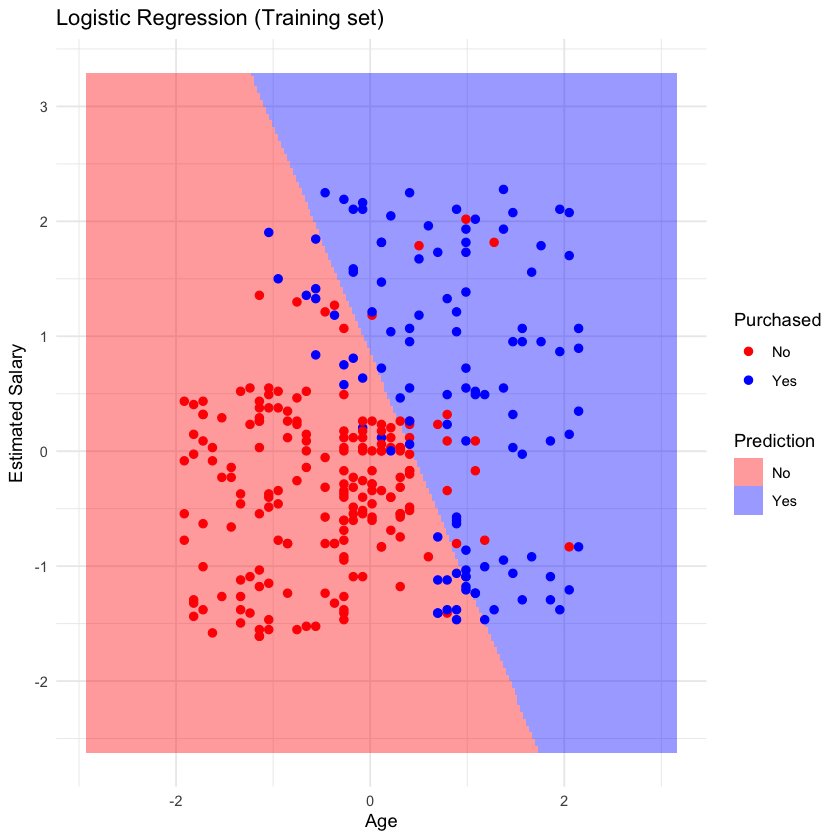

In [16]:
pred_boundary(train_data, 'Training set')

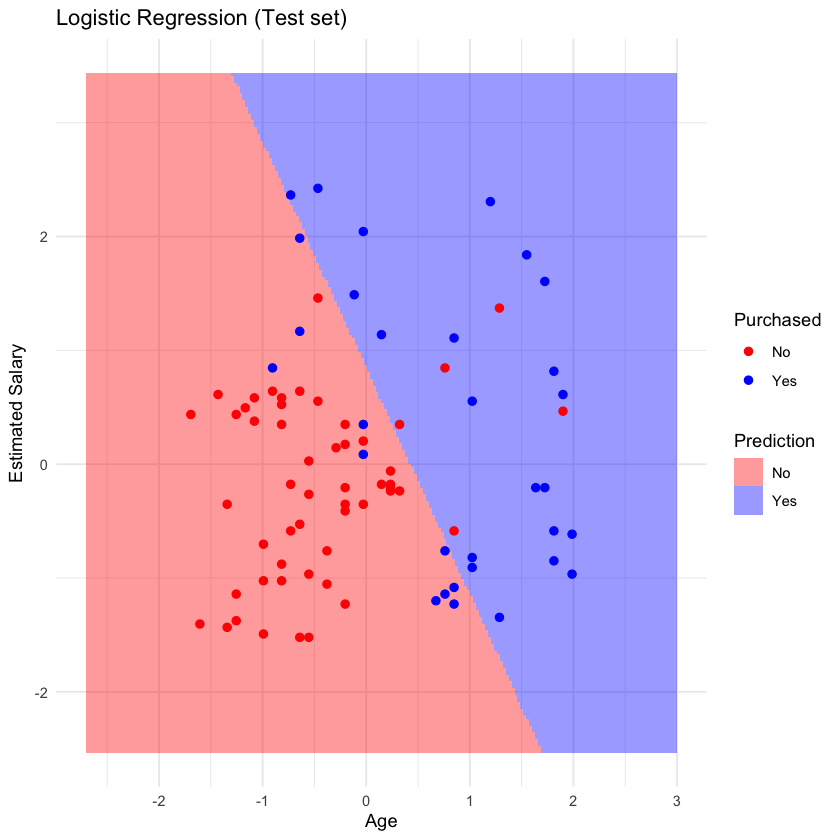

In [17]:
pred_boundary(test_data, 'Test set')

## Cross Validation

In [19]:
library(caret)

control <- trainControl(method = 'cv', number = 10)
set.seed(123)
cv_model <- train(Purchased ~ ., 
                  data = train_data, 
                  method = 'glm', 
                  family = "binomial", 
                  trControl = control, 
                  preProcess = c("center", "scale"))

# Extract results
accuracy <- cv_model$results$Accuracy  # Mean accuracy
std_dev <- cv_model$results$AccuracySD  # Standard deviation of accuracy

# Print results
print(paste("Accuracy on training set:", round(accuracy * 100, 2), "%"))
print(paste("Standard deviation on training set:", round(std_dev * 100, 2), "%"))

# Evaluate on the test set
pred_prob <- predict(cv_model, newdata = test_data[-3], type = "prob")[[2]]
y_pred <- ifelse(pred_prob > 0.5, 'Yes', 'No')

accuracy <- mean(test_data$Purchased == y_pred)
print(paste0('Accuracy : ', round(accuracy*100, 2), "%"))

[1] "Accuracy on training set: 84.36 %"
[1] "Standard deviation on training set: 3.73 %"
[1] "Accuracy : 82.14%"
